In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('example00.txt', sep=",", header=None, names=['addr','ip'])
print(data.shape)

data=data[data["ip"].duplicated()]
data=data.groupby('ip')["addr"].apply(list)
print(data.head(5))
print(data.shape)

data = data.values.tolist()
print(len(data))


(3878116, 2)
ip
4247207    [279264050818752, 279264050818752, 27926405081...
4247223    [44977833407616, 44977833407616, 4497783340761...
4247231    [279264050819008, 279264050819008, 27926405081...
4247239    [279264050818880, 279264050818880, 27926405081...
4247328    [279264050818944, 279264050818944, 27926405081...
Name: addr, dtype: object
(195,)
195


In [3]:
MAX_DATASET_SIZE=20000
X_SIZE=256
Y_SIZE=16
TAKE_NUM=256

x=[]
y=[]
counter=0
for liste in data:
    liste = np.diff(liste)
    liste = [i for i in liste if i != 0]
    if(len(liste)>X_SIZE+Y_SIZE+TAKE_NUM):
        ind=range(1,len(liste)-Y_SIZE-X_SIZE)
        chosen = random.sample(ind,TAKE_NUM)
        for item in chosen:
            x.append(liste[item:item+X_SIZE])
            y.append(liste[item+X_SIZE:item+X_SIZE+Y_SIZE])
            counter=counter+1
    if(counter>MAX_DATASET_SIZE):
        break
x=np.array(x)
y=np.array(y)

print(x.shape)
print(y.shape)
print(np.count_nonzero(x))
print(np.count_nonzero(y))


(20224, 256)
(20224, 16)
5177344
323584


In [4]:
def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Entry block
    x = tf.keras.layers.LayerNormalization()(inputs)
    x = tf.keras.layers.Dropout(0.2)(x)
    # We specify activation=None so as to return logits
    x = tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01))(x)
    outputs = tf.keras.layers.Dense(Y_SIZE, activation="relu")(x)
    return tf.keras.Model(inputs, outputs)


model = make_model(input_shape=(X_SIZE), num_classes=2)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
layer_normalization (LayerNo (None, 256)               512       
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0     

In [5]:
pred=model(x[0:64])
print(x[0])
print(pred[0])


[              64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64               64               64
               64               64

<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'flo

<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'flo

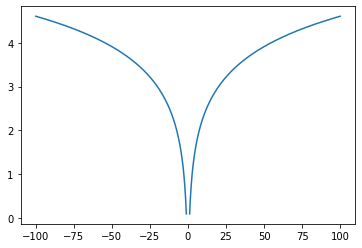

In [6]:
alpha=1
def myloss(y_true, y_pred):    #difference between true label and predicted label
    y_true= tf.cast(y_true, tf.float32)
    print(y_true.dtype)
    loss = tf.math.abs(y_true - y_pred)*alpha
    loss = tf.where(loss<1,0,loss)
    loss = tf.reduce_mean(tf.math.log(loss))
    return  loss 


x_plot = np.linspace(-100, 100, 1000)
y_plot=[]
for xi in x_plot:
    y_plot.append(myloss(np.zeros(shape=(2)),np.full((2),xi)))
plt.plot(x_plot, np.stack(y_plot))
plt.show()

In [7]:
print(x.dtype)
print(y.dtype)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"],
)
history = model.fit(x, y, batch_size=512, epochs=50, validation_split=0.2)

int64
int64
Epoch 1/50


32/32 [==============================] - 1s 14ms/step - loss: 828784902144.0000 - accuracy: 0.1073 - val_loss: 308347469824.0000 - val_accuracy: 0.1352
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 828784771072.0000 - accuracy: 0.1179 - val_loss: 308347469824.0000 - val_accuracy: 0.0176
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 828784967680.0000 - accuracy: 0.0321 - val_loss: 308347469824.0000 - val_accuracy: 0.0176
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 828784771072.0000 - accuracy: 0.0276 - val_loss: 308347469824.0000 - val_accuracy: 0.0410
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 828784902144.0000 - accuracy: 0.0671 - val_loss: 308347469824.0000 - val_accuracy: 0.0485
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 828784967680.0000 - accuracy: 0.0674 - val_loss: 308347469824.0000 - val_accuracy: 0.0836
Epoch 7/50
32/32 [================

In [8]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
import torch
import torchvision

# An instance of your model.
model = torchvision.models.resnet18()

# An example input you would normally provide to your model's forward() method.
example = torch.rand(1, 3, 224, 224)

# Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
traced_script_module = torch.jit.trace(model, example)
traced_script_module.save("traced_resnet_model.pt")

ModuleNotFoundError: No module named 'torch'